# Exercício 2.3
Utilizando o exemplo visto em sala com o dataset CC_GENERAL.csv, aplique o algoritmo DBSCAN e tente construir uma busca de parâmetros para calibrar o min_samples e o eps.
Faça a plotagem da clusterização gerada (com cores diferentes para cada cluster). 

* a) Qual é a melhor quantidade de Clusters utilizando o método silhueta?
* b) Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nesse conjunto de dados?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
#Following is the Data Dictionary for Credit Card dataset :

#CUST_ID : Identification of Credit Card holder (Categorical) 
#BALANCE : Balance amount left in their account to make purchases  - Valor do saldo restante em sua conta para fazer compras 
#BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) - Com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
#PURCHASES : Amount of purchases made from account 
#ONEOFF_PURCHASES : Maximum purchase amount done in one-go - quantidade máxima de compra feita de uma vez 
#INSTALLMENTS_PURCHASES : Amount of purchase done in installment  - Valor da compra parcelado
#CASH_ADVANCE : Cash in advance given by the user - Dinheiro a vista dado pelo usuário
#PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) - Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 
#ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) - Com que frequência as compras acontecem de uma só vez (1 = comprado com frequência, 0 = comprado com pouca frequência)
#PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) - Com que frequência as compras parceladas estão sendo feitas
#CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 
#CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" - Número de transações feitas com "Dinheiro adiantado"
#PURCHASES_TRX : Number of purchase transactions made - Numbem of purchase transactions made 
#CREDIT_LIMIT : Limit of Credit Card for user - Limite de cartão de crédito para o usuário
#PAYMENTS : Amount of Payment done by user 
#MINIMUM_PAYMENTS : Minimum amount of payments made by user - Quantidade mínima de pagamentos feitos pelo usuário 
#PRCFULLPAYMENT : Percent of full payment paid by user - Porcentagem do pagamento total pago pelo usuário
#TENURE : Tenure of credit card service for user - Posse do serviço de cartão de crédito para o usuário

#Faz a leitura do dataset
dataset = pd.read_csv('bases/CC_GENERAL.csv')
dataset = dataset.drop('CUST_ID', axis = 1) 

#Preenche as células vazias (NA) copiando a próxima observação válida para esta que é NA
dataset.fillna(method ='ffill', inplace = True) 

dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#Normaliza os Dados:
scaler = StandardScaler() 
dataset_norm = scaler.fit_transform(dataset) 

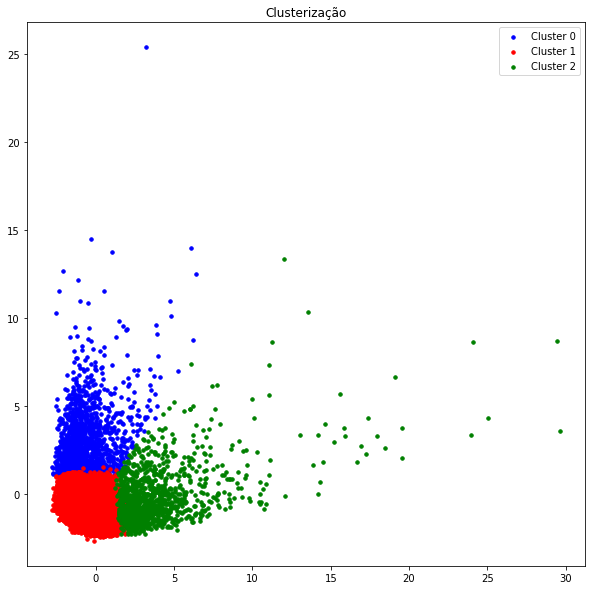

In [4]:
# Clusterização via K-Means apresentada no exemplo
kdata = dataset_norm.copy()
# A partir do gráfico acima percebemos o que o númedo ideal de clusters está entre 5 e 6, escolhemos o 6 para nosso caso.
kmeans = KMeans(n_clusters = 3)
kmeans.fit(kdata)
labels = kmeans.labels_

#Como plotar graficamentes estes Clusters?    
pca = PCA(n_components=2).fit_transform(dataset_norm)

plt.figure(1, figsize=(10,10))
#Faz a plotagem dos registros do primeiro cluster 0 (y_kmeans == 0) e utiliza as colunas de indice 0 e 1 (sepal_Length e sepal_width) para a plotagem dos pontos nas intruções x[y_kmeans == 0, 0] e x[y_kmeans == 0, 1]
plt.scatter(pca[labels == 0, 0], pca[labels == 0, 1], s = 12, c = 'blue', label = 'Cluster 0')
plt.scatter(pca[labels == 1, 0], pca[labels == 1, 1], s = 12, c = 'red', label = 'Cluster 1')
plt.scatter(pca[labels == 2, 0], pca[labels == 2, 1], s = 12, c = 'green', label = 'Cluster 2')


plt.legend()
plt.title('Clusterização')
plt.show()

In [5]:
X = dataset_norm.copy()

# Encontrando o melhor epsilon via silhouette_score
eps_grid = np.linspace(1, 15, num=6)
ms_grid = range(18, 38, 4)
eps_best = eps_grid[0]
ms_best = ms_grid[0]
silhouette_score_max = -1

for min_sample in ms_grid:
    for eps in eps_grid:
        # Treinar o DBSCAN cluster
        model = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=2).fit(X)
        # Obter as labels
        labels = model.labels_
        if len(set(labels)) > 1:
            # Obter as mmetricas de performance
            silhouette_score = round(metrics.silhouette_score(X, labels), 4)
            if silhouette_score > silhouette_score_max:
                print("Epsilon: {:.4f}".format(eps), "Min Sample: ", min_sample, "--> silhouette score:", silhouette_score)
                silhouette_score_max = silhouette_score
                eps_best = eps
                ms_best = min_sample

# Melhores (hiper)parametros
print("Melhor epsilon =", eps_best, "e melhor min sample =", ms_best)

Epsilon: 1.0000 Min Sample:  18 --> silhouette score: 0.0415
Epsilon: 3.8000 Min Sample:  18 --> silhouette score: 0.6673
Epsilon: 6.6000 Min Sample:  18 --> silhouette score: 0.7805
Epsilon: 9.4000 Min Sample:  18 --> silhouette score: 0.8229
Epsilon: 12.2000 Min Sample:  18 --> silhouette score: 0.8461
Epsilon: 15.0000 Min Sample:  26 --> silhouette score: 0.8533
Melhor epsilon = 15.0 e melhor min sample = 26


In [6]:
dbsdata = dataset_norm.copy()

db = DBSCAN(eps=eps_best, min_samples=ms_best).fit(dbsdata)
print('Labels:', set(db.labels_))

Labels: {0, -1}


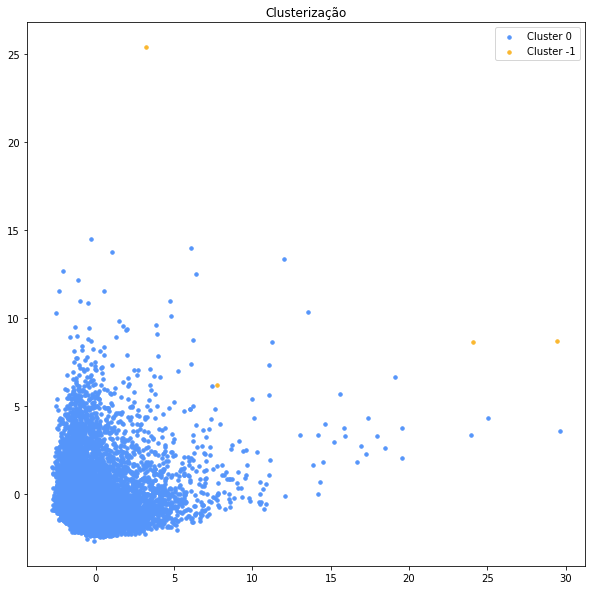

In [7]:
labels = db.labels_ 

pca = PCA(n_components=2).fit_transform(dataset_norm)

plt.figure(2, figsize=(10,10))
plt.scatter(pca[labels == 0, 0], pca[labels == 0, 1], s = 12, c = '#5595FA', label = 'Cluster 0')
plt.scatter(pca[labels == -1, 0], pca[labels == -1, 1], s = 12, c = '#FAB72F', label = 'Cluster -1')

plt.legend()
plt.title('Clusterização')
plt.show()

## a) Qual é a melhor quantidade de Clusters utilizando o método silhueta?
A partir da grid search o melhor resultado de silhouete score encontrado foi de 1 cluster enquanto algumas observações não puderam ser clusterizadas (possivelmente outliers).

## b) Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nesse conjunto de dados?
Comparando com a clusterização feita em sala, o DBSCAN não foi capaz de separar os clusters, enquanto o K-means foi capaz de separar em 3 difereentes grupos, portanto o método k-means foi mais eficiente para este conjunto de dados. 